<a href="https://colab.research.google.com/github/vaishnavipatil29/PR-ML-Assignments/blob/main/Copy_of_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Classification:

 1. Linear regression
 2. Logistic regression

 3. Support vector machine


# Linear regression

1. Generate 1D data synthetically
2. Take the earlier designed linear regression class
3. Find the fitting line 
4. Taking 0.5 as threshold, see the classification    

Colab-link https://colab.research.google.com/drive/15A73xlgnM9X7A_JappTx65ix2fZBQ2tl?usp=sharing

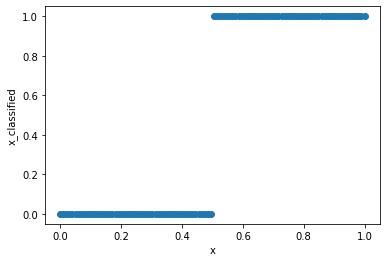

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# insert your code here
x = np.linspace(0,1,100)
#print(x)
x_classified = []
for i in x:
  if i >= 0.5:
    x_classified.append(1)
  elif i<0.5:
    x_classified.append(0)
#print(x_classified)
plt.scatter(x,x_classified)
plt.xlabel('x')
plt.ylabel('x_classified')
plt.show()


Defining linear regression class

In [ ]:
# linear regression class
class lin_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w=w_old + 2*lr*(x @ (y - x.T @w_old))/y.shape[0]# insert your code here
    return w  

  def error(self,w,y,x):
    return np.mean(np.square(y - x.T @ w)) # insert your code here

  def mat_inv(self,y,x_aug):
    return np.linalg.pinv(x_aug @ x_aug.T) @ x_aug @ y # insert your code here
    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    err=[]
    w_pred = np.random.rand(len(x),1)
    for i in range(1000):
     # insert your code here
     err.append(self.error(w_pred,y,x))
     w_pred = self.grad_update(w_pred,lr,y,x)
    err = np.asarray(err)
    return w_pred,err


Data augmentation and optimal weight generation

In [ ]:
x = np.array(x)
x=x[:,np.newaxis] 
#print(x)
x=x.T     # to make this in M x N format, where M is the dimension
print(x.shape)
x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)

y = np.array(x_classified)
y=y[:,np.newaxis]

ln_reg=lin_regression()
w_opt=ln_reg.mat_inv(y,x_aug)


(1, 100)
(2, 100)


1. Optimal separating plane generation
2. Classification (0.5 as threshold)


[[-0.24257426]
 [ 1.48514851]]
[[-0.10976214]
 [ 1.23733431]]
(2, 1)


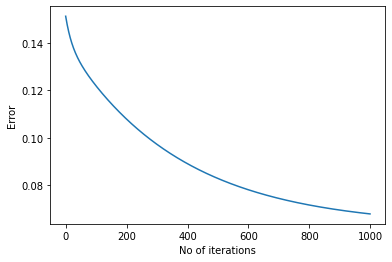

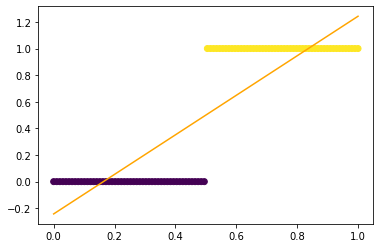

In [ ]:
print(w_opt) #parameters obtained from matrix inversion method
lr=0.01
[w_opt2,err]=ln_reg.Regression_grad_des(x_aug,y,lr)
print(w_opt2)#parameters obtained from gradient descent method
print(np.shape(w_opt2))

# insert your code here
#plotting errors in gradient descent
plt.figure()
plt.plot(err)
plt.xlabel('No of iterations')
plt.ylabel('Error')

y_plane = w_opt[1] * x + w_opt[0]

#plotting seperating plane
plt.figure()
plt.scatter(x,x_classified,c=x_classified)
plt.plot(x.T,y_plane.T,color = 'orange')

plt.show()


## Draw back of linear regression based classification
1. Generate data (have outlairs noise)
2. Find the fitting line.
3. Using 0.5 as threshold, see the classification
4. using matrix inversion (home work)


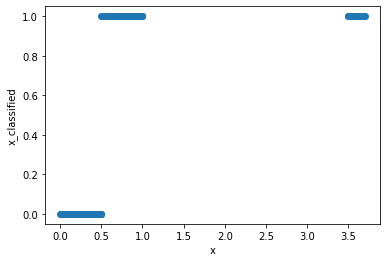

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# insert your code here
x = np.concatenate((np.linspace(0,1,250),np.linspace(3.5,3.7,50)))
x = np.array(x)
x_classified = []
for i in x:
  if i >= 0.5:
    x_classified.append(1)
  elif i<0.5:
    x_classified.append(0)
#print(x_classified)
plt.scatter(x,x_classified)
plt.xlabel('x')
plt.ylabel('x_classified')
plt.show()



Augment data

In [ ]:
# Augment data

x=x[:,np.newaxis]
y = np.array(x_classified)
y=y[:,np.newaxis]

x_aug=np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)
print(x_aug.shape)



(2, 300)


1. find optimal weight
2. perform classification (0.5 as threshold)

(300, 1)
[[0.35191126]
 [0.22762023]]


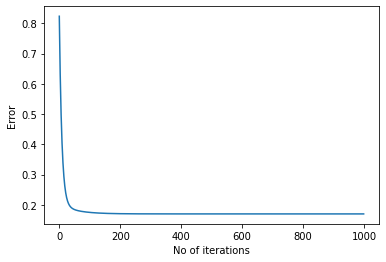

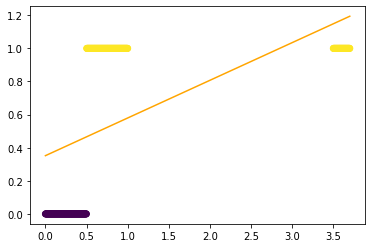

In [ ]:
lr=0.01

lin_reg=lin_regression()
# insert your code here
print(y.shape)
[w_opt2,err]=lin_reg.Regression_grad_des(x_aug,y,lr)
print(w_opt2)#parameters obtained from gradient descent method


#plotting errors in gradient descent
plt.figure()
plt.plot(err)
plt.xlabel('No of iterations')
plt.ylabel('Error')

y_plane = w_opt2[1] * x + w_opt2[0]


#plotting seperating plane
plt.figure()
plt.scatter(x,x_classified,c=x_classified)
plt.plot(x,y_plane,color = 'orange')

plt.show()


# logistic regression
1. Error surface (logistic loss vs. MSE)
2. Solve the outlair issue
3. Circularly separable data classification
4. Multiclass classification

## Error surface (logistic loss vs. MSE)

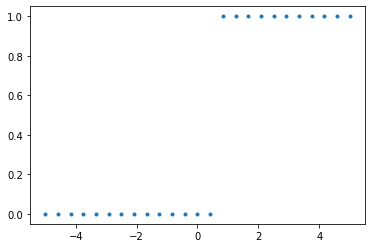

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')
plt.show()

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [ ]:
# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])

w0=-w1_in*0.7314 #initialise w0
w1=np.linspace(-w1_in,4*w1_in,25) #vary w1
w = [w0,w1] #parameters

cost_fn_mse=[]  #MSE
cost_fn_logis=[] #logistic cost function
#print(x.shape[0])
for i in range(w1.shape[0]):
 # insert your code here
  z = w0+ w1[i]*x #theta'x
  y_p  = 1/(1+np.exp(-z))   #hypothesis:sigmoid
  cost_mse = (1/2)*np.mean(np.square(y_p - y))  #Mean Squared Error
  cost_fn_mse.append(cost_mse)
  
  cost_logis= -1*np.mean(y*np.log(0.00001+y_p) +(1-y)*np.log(0.00001+1-y_p))#Logistic Cost Funnction
 
  cost_fn_logis.append(cost_logis)
#print(cost_fn_logis)
#print(cost_fn_mse)

Text(0, 0.5, 'Blue:MSE,Black:Logistic Loss')

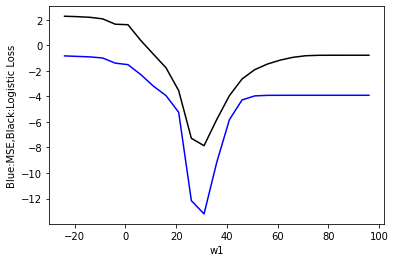

In [ ]:
# ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),color='blue')
plt.plot(w1,np.log(cost_fn_logis),color='black')
plt.xlabel('w1')
plt.ylabel('Blue:MSE,Black:Logistic Loss')

## Solve the outlier issue


(300,)
(100,)
(300,)


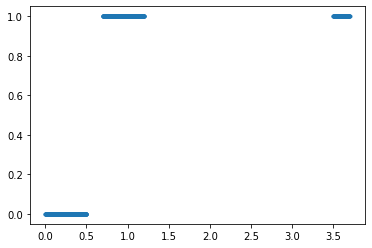

In [ ]:
# logistic regression
import numpy as np
import matplotlib.pyplot as plt

# insert your code here
x1 = np.linspace(0,0.5,300)
x2 = np.linspace(0.7,1.2,300)
x3 = np.linspace(3.5,3.7,100)
x = np.concatenate((x1,x2,x3))
x = np.array(x)
x_classified = []
for i in x:
  if i >= 0.7:
    x_classified.append(1)
  elif i<0.7:
    x_classified.append(0)
x_classified = np.array(x_classified)
print(x1.shape)
print(x3.shape)
print(x2.shape)
plt.figure()
plt.plot(x,x_classified,'.')

In [ ]:
from numpy import log, dot, e
from numpy.random import rand
class Logistic_Regression:
    
    def sigmoid(self, z):
       return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=2000, lr=0.05):        
        loss = []
        weights = rand(X.shape[1],1)
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            y_hat = np.asarray(y_hat)
            y_hat = y_hat.reshape(len(y_hat),1) 
            weights -= lr * dot(X.T,  y_hat - y) / N           
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
        return self.weights,self.loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [ ]:
# augmentation and data formating
X =x;
x=x[:,np.newaxis] #1D to 2D array
y = x_classified
y=y[:,np.newaxis]
print(x.shape)
print(y.shape)
x_aug=np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)



(700, 1)
(700, 1)


[[-3.01556724]
 [ 5.28136667]]


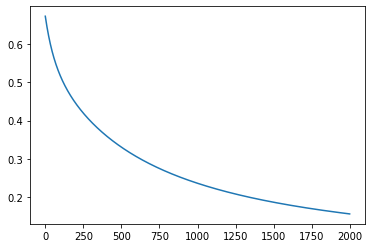

In [ ]:


y = np.asarray(y)
x_aug =np.asarray(x_aug)
x_aug = x_aug.reshape(2,700)
y = y.reshape(700,1) 

log_reg=Logistic_Regression()
weights,err=log_reg.fit(x_aug.T,y)
print(weights)

plt.plot(err)

plt.show()

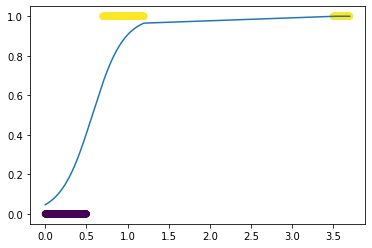

In [ ]:
# output computation
# insert your code here
z =  dot(x_aug.T, weights)
y_pred = log_reg.sigmoid(z)
x_classified = log_reg.predict(x_aug.T)
plt.plot(X,y_pred)
plt.scatter(X,x_classified,c=x_classified)
plt.show()

## Classification of circularly separated data using logistic regression



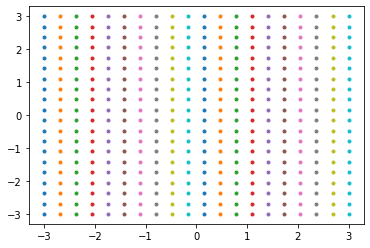

In [ ]:
# Generating circularly separated data
import numpy as np
import matplotlib.pyplot as plt


x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')
plt.show()

1. Circularly separated data generation

(400, 2)
(32, 2)
(332, 2)
(364, 2)


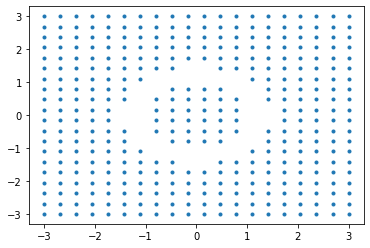

In [ ]:
x1=x11.flatten()
x2=x22.flatten()

x=np.concatenate((x1[:,np.newaxis],x2[:,np.newaxis]),axis=1) # to make matrix format
print(x.shape)

aind=np.where((x[:,0]**(2)+x[:,1]**(2))<=0.9)

bind=np.where((x[:,0]**(2)+x[:,1]**(2))>=2.2)

x1=x[aind[0],:]
x2=x[bind[0],:]
print(x1.shape)
print(x2.shape)
x=np.concatenate((x1,x2))
print(x.shape)

plt.plot(x[:,0],x[:,1],'.')
plt.show()

As in case of circularly separated data, the boundary is nonlinear, so squred feature is taken.

(3, 364)
[[-1.9992102 ]
 [ 1.68453436]
 [ 1.68086653]]


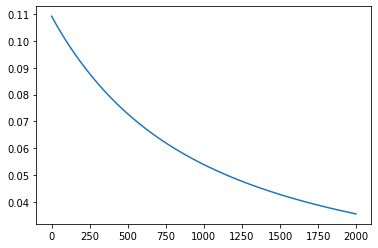

In [ ]:
# perform logistic regression

y1=np.zeros((x1.shape[0]))
y2=np.ones((x2.shape[0]))
y=np.concatenate((y1,y2))

x_aug= np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)# insert your code here  
x_aug = np.square(x_aug)  # squring to learn circular separation
print(x_aug.shape)

log_reg=Logistic_Regression()
w_pred,err=log_reg.fit(x_aug.T,y[:,np.newaxis])
print(w_pred)
plt.plot(err)
plt.show()

Plot classification using 0.5 as threshold

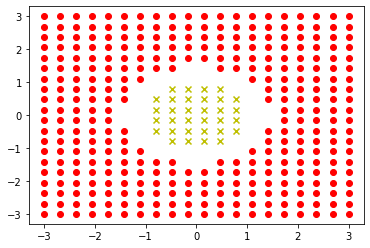

In [ ]:
z =  dot(x_aug.T, w_pred)
y_pred = log_reg.sigmoid(z)
#print(y_pred.shape)
# insert your code here

for i in range(364) :
  if y_pred[i] < 0.5 :
    plt.scatter(x[i][0],x[i][1],color='y',marker = 'x')
  else:
    plt.scatter(x[i][0],x[i][1],color='r')



## Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. lets take polynomial of order 2 (by seeing the data distribution)

(300,)


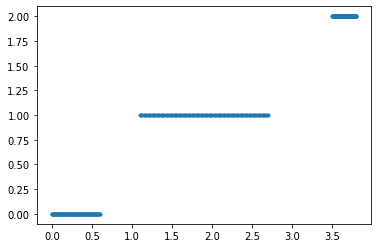

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')


In [ ]:
def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

In [ ]:
x_aug=data_transform(x[np.newaxis,:],2)
print(x_aug.shape)
x_sq[:,2]=np.square(x_aug[:,2])
x1_sq[:,2]=np.square(x_aug[:,2])
x2_sq[:,2]=np.square(x_aug[:,2])
x3_sq[:,2]=np.square(x_aug[:,2])

(3, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


[[-3.32046464]
 [ 0.72143389]
 [ 2.85118104]]


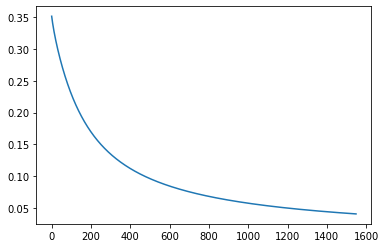

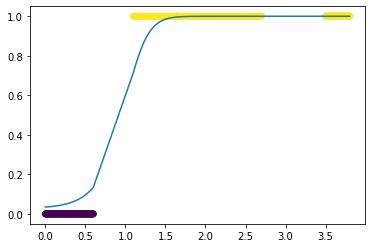

In [ ]:
# plot for classification
y[200:300] = 1
y = np.asarray(y)
y = y.reshape(300,1)

weights1,err=log_reg.fit(x_aug.T,y)
z =  dot(x_aug.T, weights1)
y_pred = log_reg.sigmoid(z)
x_classified = log_reg.predict(x_aug.T)
print(weights)
plt.plot(err)
plt.show()
plt.plot(x,y_pred)
plt.scatter(x,x_classified,c=x_classified)
plt.show()

[[ 3.11043084]
 [-5.36199361]
 [ 1.45422881]]


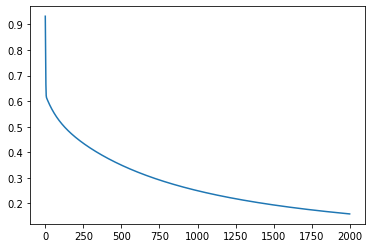

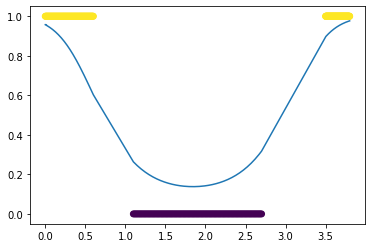

In [ ]:
y[100:200] = 0
y[0:100] = 1
y = np.asarray(y)
y = y.reshape(300,1)
weights2,err=log_reg.fit(x_aug.T,y)
z =  dot(x_aug.T, weights2)
y_pred = log_reg.sigmoid(z)
x_classified = log_reg.predict(x_aug.T)
print(weights)
plt.plot(err)
plt.show()
plt.plot(x,y_pred)
plt.scatter(x,x_classified,c=x_classified)
plt.show()

[[ 3.90248294]
 [ 2.84521473]
 [-1.39180895]]


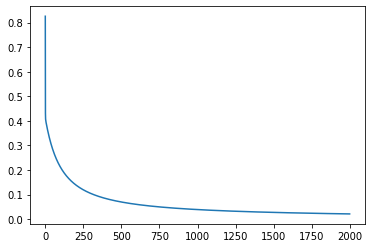

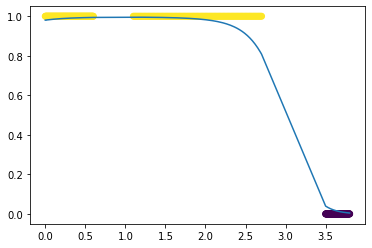

In [ ]:
# take class 2 as '0' and other to '1'
# insert your code here
# ploting
y[100:200] = 1
y[0:100] = 1
y[200:300] = 0
y = np.asarray(y)
y = y.reshape(300,1)
weights3,err=log_reg.fit(x_aug.T,y)
z =  dot(x_aug.T, weights)
y_pred = log_reg.sigmoid(z)
x_classified = log_reg.predict(x_aug.T)
print(weights3)
plt.plot(err)
plt.show()
plt.plot(x,y_pred)
plt.scatter(x,x_classified,c=x_classified)
plt.show()

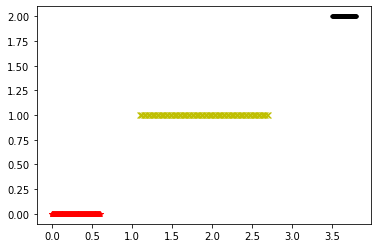

In [ ]:
# final classification

# insert your code here
# Plot decision boundaries

prob_0 = log_reg.sigmoid(weights1[0] + x1*weights1[1] + x1_sq*weights1[2])
prob_1 = log_reg.sigmoid(weights2[0] + x2*weights2[1] + x2_sq*weights2[2])
prob_2 = log_reg.sigmoid(weights3[0] + x3*weights3[1] + x3_sq*weights3[2])
prob_max = np.zeros(shape=x1.shape)
for i in range(prob_max.shape[0]):
    for j in range(prob_max.shape[1]):
        maximum = max(prob_0[i][j], prob_1[i][j], prob_2[i][j])
        if maximum == prob_0[i][j]:
            prob_max[i][j] = 0
        elif maximum == prob_1[i][j]:
            prob_max[i][j] = 1
        else:
            prob_max[i][j] = 2

plt.figure()
plt.plot(x1,prob_max[0:100],'*',color='r')
plt.plot(x2,prob_max[100:200],'x',color='y')
plt.plot(x3,prob_max[200:300],'.',color='k')
#plt.figure()
#plt.plot(x1,np.zeros(x1.shape),'*',color='r')
#plt.plot(x2,np.ones(x2.shape),'x',color='y')
#plt.plot(x3,np.tile([2],x3.shape),'.',color='k')

# Support vector machine

1. Try to maximize the margin of separation between data.
2. Instead of learning wx+b=0  separating hyperplane directly (like logistic regression), SVM try to learn wx+b=0, such that, the margin between two hyperplanes wx+b=1 and wx+b=-1 (also known as support vectors) is maximum. 
3. Margin between wx+b=1 and wx+b=-1 hyperplane is $\frac{2}{||w||}$
4. we have a constraint optimization problem of maximizing $\frac{2}{||w||}$, with constraints wx+b>=1 (for +ve class) and wx+b<=-1 (for -ve class).
5. As $y_{i}=1$ for +ve class and $y_{i}=-1$ for -ve class, the constraint can be re-written as:
$$y(wx+b)>=1$$

6. Final optimization is (i.e to find w and b):
$$\min_{||w||}\frac{1}{2}||w||,$$
$$y(wx+b) \geq 1,~\forall ~data $$












Acknowledgement:

https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Data generation:
1. Generate 2D gaussian data with fixed mean and variance for 2 class.(var=Identity, class1: mean[-4,-4], class2: mean[1,1], No. of data 25 from each class)
2. create the label matrix
3. Plot the generated data

(50, 2)
(50,)


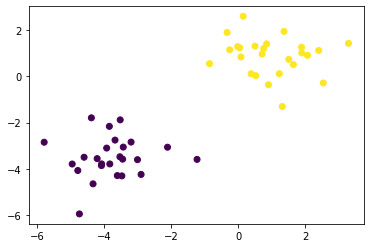

In [ ]:
No_sample=50
mean1=np.array([-4,-4])
var1=np.array([[1,0],[0,1]])
mean2=np.array([1,1])
var2=var1
data1=np.random.multivariate_normal(mean1,var1,int(No_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_sample/2))
X=np.concatenate((data1,data2))
print(X.shape)
y=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
print(y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
#print(X)

Create a data dictionary, which contains both label and data points.

In [ ]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==-1:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)} 
#print(data_dict)

## SVM training
1. create a search space for w (i.e w1=w2),[0, 0.5*max((abs(feat)))] and  for b, [-max((abs(feat))),max((abs(feat)))], with appropriate step.
2. we will start with a higher step and find optimal w and b, then we will reduce the step and again re-evaluate the optimal one.

3. In each step, we will take transform of w, [1,1], [-1,1],[1,-1] and [-1,-1] to search arround the w. 

4. In every pass (for a fixed step size) we will store all the w, b and its corresponding ||w||, which make the data correctly classified as per the condition $y(wx+b) \geq 1$. 

5. Obtain the optimal hyperplane having minimum ||w||.

6. Start with the optimal w and repeat the same (step 3,4 and 5) for a reduced step size.


In [ ]:
# it is just a searching algorithem, not a complicated optimization algorithem, (just for understanding of concepts through visualization)


def SVM_Training(data_dict):

    # insert your code here
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5

    for lrate in learning_rate:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation
                    
                    correctly_classified = True
                    
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2
    return w,b



-1.2272517377633916
3.2855404053510378


**Training**

In [ ]:

#all the required variables 
w=[] #weights 2 dimensional vector
b=[] #bias
max_feature_value=float('-inf')
min_feature_value=float('+inf')
      
for yi in data_dict:
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]
w,b=SVM_Training(data_dict)
print(w)
print(b)

[0.4468335 0.4468335]
1.1499391418728413


## Visualization of the SVM separating hyperplanes (after training)

In [ ]:
def visualize(data_dict):
       
        
        
        
        plt.scatter(X[:,0],X[:,1],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        
        hyp_x_min = np.min([np.min(data_dict[1]),np.min(data_dict[-1])])
        hyp_x_max = np.max([np.max(data_dict[1]),np.max(data_dict[-1])])

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        
        

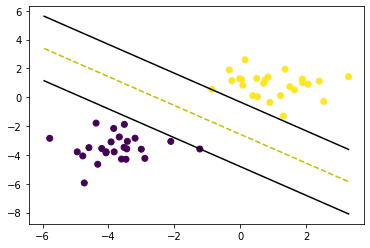

In [ ]:
fig = plt.figure()
visualize(data_dict)

## Testing

1. Generate test data as like training
2. See the classification

3. if $wx_{test}+b > 0$, $y_{test}=1$ else $y_{test}=-1$


In [ ]:
def predict(data,w,b):
  y_pred=np.sign(np.dot(data,w)+b)
  return y_pred

test accuracy= 100.0


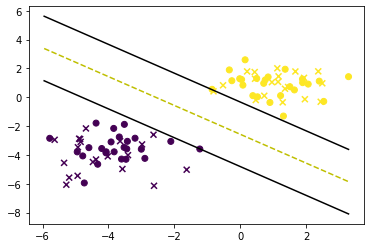

In [ ]:
No_test_sample=40
data1=np.random.multivariate_normal(mean1,var1,int(No_test_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_test_sample/2))
test_data=np.concatenate((data1,data2))
y_gr=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))


# evaluate with the trained model

y_pred=predict(test_data,w,b)

accuracy_list= [1 for i in range(len(y_pred)) if y_pred[i] == y_gr[i]]# insert your code here
accuracy = (sum(accuracy_list)/len(accuracy_list))*100


print('test accuracy=',accuracy)

#  Visualization
plt.figure()
visualize(data_dict)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=y_gr)
plt.show()

